In [1]:
import yaml
import fitting
from qibolab.pulses import PulseSequence, Pulse, ReadoutPulse, Rectangular, Gaussian, Drag
from qibolab.platforms.qbloxplatform import QBloxPlatform
from qibolab.platform import Platform


from diagnostics import backup_config_file, \
                        get_config_parameter, \
                        save_config_parameter, \
                        plot, \
                        create_measurement_control, \
                        run_resonator_spectroscopy, \
                        run_punchout, \
                        run_qubit_spectroscopy, \
                        run_rabi_pulse_length, \
                        run_rabi_pulse_gain, \
                        run_rabi_pulse_length_and_gain, \
                        run_rabi_pulse_length_and_amplitude, \
                        run_t1, \
                        run_ramsey, \
                        run_spin_echo, \
                        run_spin_echo_3pulses, \
                        run_shifted_resonator_spectroscopy

[Qibo 0.1.6|INFO|2022-03-24 08:59:43]: Using numpy backend on /CPU:0
[Qibo 0.1.6|WARNING|2022-03-24 08:59:43]: numpy backend uses `np.einsum` and supports CPU only. Consider installing the qibojit or qibotf backends for increased performance and to enable GPU acceleration.


In [2]:
#save a copy of the last platform configurtion (tiiq.yml) before making any changes
backup_config_file()

Copying file: /home/joel-perez/repos/qibolab/src/qibolab/runcards/qili.yml
Destination file/home/joel-perez/repos/qibolab/examples/qili_single_qubit/data/settings_backups/qili_24032022085943.yml
Platform settings backup done


In [3]:
if __name__ == "__main__":
    with open("settings.yaml", "r") as file:
        settings = yaml.safe_load(file)

In [4]:
#Allocate, connect and setup Tiiq Platform for running diagnostics
platform = Platform("qili")
platform.connect()
platform.setup()

[Qibo 0.1.6|INFO|2022-03-24 08:59:44]: Loading platform qili
[Qibo 0.1.6|INFO|2022-03-24 08:59:44]: Loading runcard /home/joel-perez/repos/qibolab/src/qibolab/runcards/qili.yml
[Qibo 0.1.6|INFO|2022-03-24 08:59:44]: Connecting to qili instruments.


Connected to: Rohde&Schwarz SGS100A (serial:1416.0505k02/113049, firmware:4.2.76.0-4.30.046.295) in 0.39s
Connected to: Rohde&Schwarz SGS100A (serial:1416.0505k02/101901, firmware:4.2.76.0-4.30.046.295) in 0.28s


Starting iterative measurement...
100% completed | elapsed time:     22s | time left:      0s  
100% completed | elapsed time:     22s | time left:      0s  Starting iterative measurement...
100% completed | elapsed time:     60s | time left:      0s  
100% completed | elapsed time:     60s | time left:      0s  
Resonator Frequency = 7327590510.769339


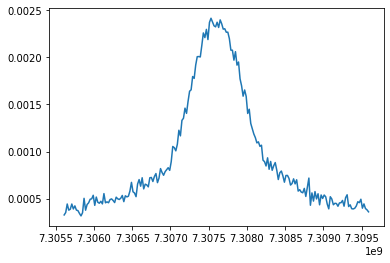

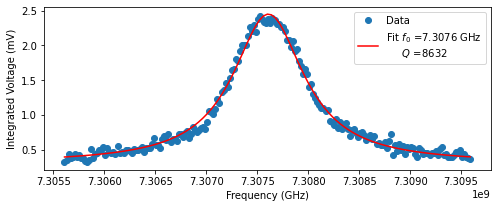

In [5]:
#Run cavity spectroscopy
qc_pulse = Pulse(start=0,
                frequency=100000000.0,
                amplitude=0.15,
                duration=4000,
                phase=0,
                shape=Gaussian(4000 / 5))
ro_pulse = ReadoutPulse(start=4004,
                        frequency=20000000.0,
                        amplitude=0.5,
                        duration=2000,
                        phase=0,
                        shape=Rectangular())
sequence = PulseSequence()
sequence.add(qc_pulse)
sequence.add(ro_pulse)
mc, pl, ins = create_measurement_control('resonator_spectroscopy')
resonator_freq, avg_min_voltage, max_ro_voltage, smooth_dataset, dataset = run_resonator_spectroscopy(platform, mc, sequence, ro_pulse, **settings["resonator_spectroscopy"])
f0, BW, Q = fitting.lorentzian_fit("last", max)
resonator_freq = (f0*1e9 + ro_pulse.frequency)

In [6]:
#save resonator params
print(get_config_parameter("settings", "", "resonator_freq"))
save_config_parameter("settings", "", "resonator_freq", float(resonator_freq))

print(get_config_parameter("LO_QRM_settings", "", "frequency"))
save_config_parameter("LO_QRM_settings", "", "frequency", float(resonator_freq - ro_pulse.frequency))

print(get_config_parameter("settings", "", "resonator_spectroscopy_avg_min_ro_voltage"))
save_config_parameter("settings", "", "resonator_spectroscopy_avg_min_ro_voltage", float(avg_min_voltage)) 

print(get_config_parameter("settings", "", "resonator_spectroscopy_max_ro_voltage"))
save_config_parameter("settings", "", "resonator_spectroscopy_max_ro_voltage", float(max_ro_voltage))

7327610510.769339
Saved value: 7327609792.361958
7307610510.769339
Saved value: 7307609792.361958
166.03531849843122
Saved value: 170.27455733997706
2404.9440051426222
Saved value: 2378.2065546431027


Starting iterative measurement...
100% completed | elapsed time:    274s | time left:      0s  
100% completed | elapsed time:    274s | time left:      0s  
Resonator Frequency = 7327610510.769339

Resonator LO Frequency  = 7307610510.769339
7327610510.769339


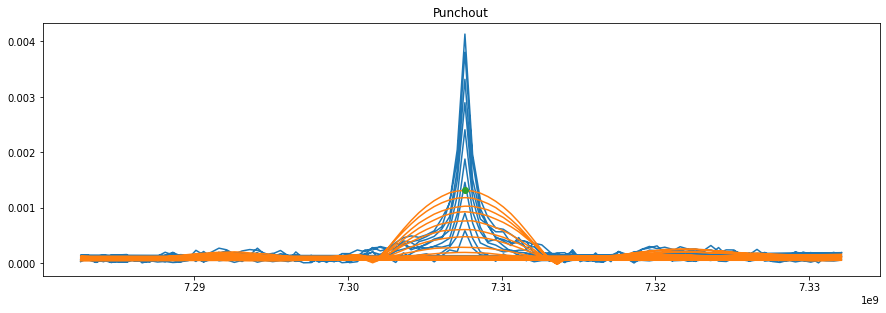

In [7]:
#Run punchout
qc_pulse = Pulse(start=0,
                frequency=100000000.0,
                amplitude=0.15,
                duration=4000,
                phase=0,
                shape=Gaussian(4000 / 5))
ro_pulse = ReadoutPulse(start=4004,
                        frequency=20000000.0,
                        amplitude=0.5,
                        duration=2000,
                        phase=0,
                        shape=Rectangular())
sequence = PulseSequence()
sequence.add(qc_pulse)
sequence.add(ro_pulse)
mc, pl, ins = create_measurement_control('punchout')
resonator_freq, smooth_dataset, dataset = run_punchout(platform, mc, sequence, ro_pulse, **settings["punchout"])
plot(smooth_dataset, dataset, "Punchout", 0)
print(dataset['x0'].values[dataset['y0'].argmax().values]+ro_pulse.frequency)

7327609792.361958
Starting iterative measurement...
100% completed | elapsed time:    120s | time left:      0s  
100% completed | elapsed time:    120s | time left:      0s  Starting iterative measurement...
100% completed | elapsed time:     36s | time left:      0s  
100% completed | elapsed time:     36s | time left:      0s  

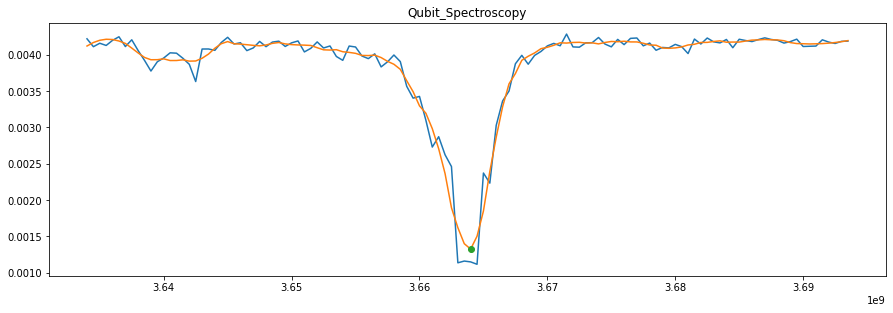

In [8]:
#Run qubit spectroscopy
qc_pulse = Pulse(start=0,
                        frequency=100000000.0,
                        amplitude=0.15,
                        duration=4000,
                        phase=0,
                        shape=Gaussian(4000 / 5))
ro_pulse = ReadoutPulse(start=4004,
                               frequency=20000000.0,
                               amplitude=0.5,
                               duration=2000,
                               phase=0,
                               shape=Rectangular())
sequence = PulseSequence()
sequence.add(qc_pulse)
sequence.add(ro_pulse)
resonator_freq = get_config_parameter("settings", "", "resonator_freq")
print(resonator_freq)
mc, pl, ins = create_measurement_control('qubit_spectroscopy2')
qubit_freq, min_ro_voltage, smooth_dataset, dataset = run_qubit_spectroscopy(platform, mc, resonator_freq, sequence, qc_pulse, ro_pulse, **settings["qubit_spectroscopy"])
plot(smooth_dataset, dataset, "Qubit_Spectroscopy", 1)

Qubit freq ontained from MC results:  3564000000.0


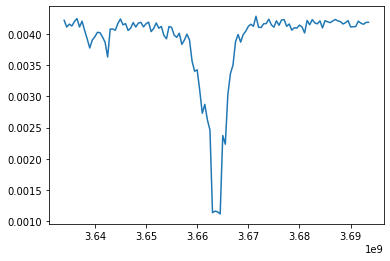

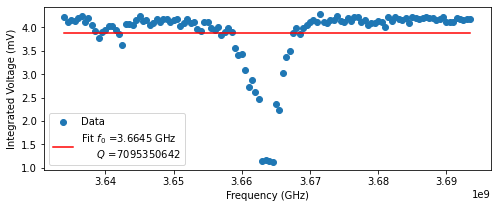

Qubit freq ontained from fitting:  3564500000.0


In [9]:
print("Qubit freq ontained from MC results: ", qubit_freq)
f0, BW, Q = fitting.lorentzian_fit("last", min)
qubit_freq = (f0*1e9 - qc_pulse.frequency)
print("Qubit freq ontained from fitting: ", qubit_freq)

In [10]:
#save qubit frequency founded - update LO_QCM freq + update qubit spec min voltage
print(get_config_parameter("settings", "", "qubit_freq"))
save_config_parameter("settings", "", "qubit_freq", float(qubit_freq))

print(get_config_parameter("LO_QCM_settings", "", "frequency"))
save_config_parameter("LO_QCM_settings", "", "frequency", float(qubit_freq + qc_pulse.frequency))

print(get_config_parameter("settings", "", "qubit_spectroscopy_min_ro_voltage"))
save_config_parameter("settings", "", "qubit_spectroscopy_min_ro_voltage", float(min_ro_voltage))

3564000000.0
Saved value: 3564500000.0
3664000000.0
Saved value: 3664500000.0
1208.063959770321
Saved value: 1324.4572132729227


Starting iterative measurement...
100% completed | elapsed time:    417s | time left:      0s  
100% completed | elapsed time:    417s | time left:      0s  
Pi pulse duration = 182.4673119043867

Pi pulse amplitude = 0.15

Pi pulse gain = 0.5

rabi oscillation min voltage = 4120.048939919676

T1 = 617.7926465511653


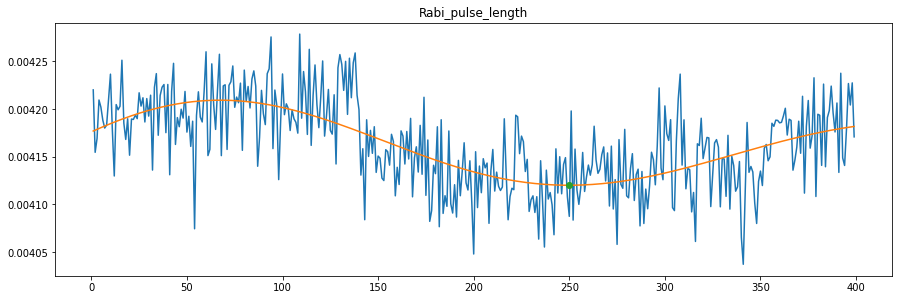

In [11]:
#Run Rabi Pulse Length
qc_pulse = Pulse(start=0,
                        frequency=100000000.0,
                        amplitude=0.40,
                        duration=44,
                        phase=0,
                        shape=Gaussian(4000 / 4))
ro_pulse = ReadoutPulse(start=4004,
                               frequency=20000000.0,
                               amplitude=0.40,
                               duration=2000,
                               phase=0,
                               shape=Rectangular())
sequence = PulseSequence()
sequence.add(qc_pulse)
sequence.add(ro_pulse)
mc, pl, ins = create_measurement_control('Rabi_pulse_length')
resonator_freq = get_config_parameter("settings", "", "resonator_freq")
qubit_freq = get_config_parameter("settings", "", "qubit_freq")

dataset, pi_pulse_gain = run_rabi_pulse_length(platform, mc, resonator_freq, qubit_freq, sequence, qc_pulse, ro_pulse)
pi_pulse_amplitude = qc_pulse.amplitude
smooth_dataset, pi_pulse_duration, rabi_oscillations_pi_pulse_min_voltage, t1 = fitting.rabi_fit(dataset)
plot(smooth_dataset, dataset, "Rabi_pulse_length", 1)

print(f"\nPi pulse duration = {pi_pulse_duration}")
print(f"\nPi pulse amplitude = {pi_pulse_amplitude}") #Check if the returned value from fitting is correct.
print(f"\nPi pulse gain = {pi_pulse_gain}") #Needed? It is equal to the QCM gain when performing a Rabi.
print(f"\nrabi oscillation min voltage = {rabi_oscillations_pi_pulse_min_voltage}")
print(f"\nT1 = {t1}")

In [12]:
#save pi pulse params founded + pi pulse min vol + T1
print(get_config_parameter("settings", "", "pi_pulse_duration"))
save_config_parameter("settings", "", "pi_pulse_duration", int(pi_pulse_duration))

print(get_config_parameter("settings", "", "pi_pulse_amplitude"))
save_config_parameter("settings", "", "pi_pulse_amplitude", float(pi_pulse_amplitude))

print(get_config_parameter("settings", "", "pi_pulse_gain"))
save_config_parameter("settings", "", "pi_pulse_gain", float(pi_pulse_gain))

print(get_config_parameter("settings", "", "rabi_oscillations_pi_pulse_min_voltage"))
save_config_parameter("settings", "", "rabi_oscillations_pi_pulse_min_voltage", float(rabi_oscillations_pi_pulse_min_voltage))

print(get_config_parameter("settings", "", "T1"))
#TODO: Double check T1 obtained from Rabi. It is not correct.
#save_config_parameter("_settings", "", "T1", t1)

98
Saved value: 182
0.15
Saved value: 0.15
0.5
Saved value: 0.5
4175.623319013894
Saved value: 4120.048939919676
2192.895853326451


In [13]:
#Run Rabi gain
#TODO: Fix error with the variable gain in mc.setables????
qc_pulse = Pulse(start=0,
                        frequency=100000000.0,
                        amplitude=0.15,
                        duration=4000,
                        phase=0,
                        shape=Gaussian(4000 / 5))
ro_pulse = ReadoutPulse(start=4004,
                               frequency=20000000.0,
                               amplitude=0.5,
                               duration=2000,
                               phase=0,
                               shape=Rectangular())
sequence = PulseSequence()
sequence.add(qc_pulse)
sequence.add(ro_pulse)

mc, pl, ins = create_measurement_control('Rabi_pulse_gain')
resonator_freq = get_config_parameter("settings", "", "resonator_freq")
qubit_freq = get_config_parameter("settings", "", "qubit_freq")

dataset = run_rabi_pulse_gain(platform, mc, resonator_freq, qubit_freq, sequence, qc_pulse, ro_pulse)
#TODO: save in platform settings data obtained

Starting iterative measurement...
100% completed | elapsed time:      9s | time left:      0s  
100% completed | elapsed time:      9s | time left:      0s  

In [14]:
#Run Rabi Pulse Length and Gain
#Modify and leave it running at night to improve plot precision
qc_pulse = Pulse(start=0,
                        frequency=100000000.0,
                        amplitude=0.15,
                        duration=4000,
                        phase=0,
                        shape=Gaussian(4000 / 5))
ro_pulse = ReadoutPulse(start=4004,
                               frequency=20000000.0,
                               amplitude=0.5,
                               duration=2000,
                               phase=0,
                               shape=Rectangular())
sequence = PulseSequence()
sequence.add(qc_pulse)
sequence.add(ro_pulse)
mc, pl, ins = create_measurement_control('Rabi_pulse_length_and_gain')
resonator_freq = get_config_parameter("settings", "", "resonator_freq")
qubit_freq = get_config_parameter("settings", "", "qubit_freq")

dataset = run_rabi_pulse_length_and_gain(platform, mc, resonator_freq, qubit_freq, sequence, qc_pulse, ro_pulse)
#TODO: save in platform settings data obtained

Starting iterative measurement...
 41% completed | elapsed time:    121s | time left:    171s  

In [ ]:
#Run Rabi Pulse Length and Amplitude
qc_pulse = Pulse(start=0,
                        frequency=100000000.0,
                        amplitude=0.15,
                        duration=4000,
                        phase=0,
                        shape=Gaussian(4000 / 5))
ro_pulse = ReadoutPulse(start=4004,
                               frequency=20000000.0,
                               amplitude=0.5,
                               duration=2000,
                               phase=0,
                               shape=Rectangular())
sequence = PulseSequence()
sequence.add(qc_pulse)
sequence.add(ro_pulse)
mc, pl, ins = create_measurement_control('Rabi_pulse_length_and_amplitude')
resonator_freq = get_config_parameter("settings", "", "resonator_freq")
qubit_freq = get_config_parameter("settings", "", "qubit_freq")

dataset = run_rabi_pulse_length_and_amplitude(platform, mc, resonator_freq, qubit_freq, sequence, qc_pulse, ro_pulse)
#TODO: save in platform settings data obtained

In [ ]:
#Run T1
pi_pulse_gain= get_config_parameter("settings", "", "pi_pulse_gain")
pi_pulse_amplitude = get_config_parameter("settings", "", "pi_pulse_amplitude")
pi_pulse_duration = get_config_parameter("settings", "", "pi_pulse_duration")
pi_pulse_frequency = get_config_parameter("settings", "", "pi_pulse_frequency")
resonator_freq = get_config_parameter("settings", "", "resonator_freq")
qubit_freq = get_config_parameter("settings", "", "qubit_freq")

qc_pulse = Pulse(start=0,
                        frequency=pi_pulse_frequency,
                        amplitude=pi_pulse_amplitude,
                        duration=pi_pulse_duration,
                        phase=0,
                        shape=Gaussian(4000 / 5))
ro_pulse = ReadoutPulse(start=pi_pulse_duration + 4,
                               frequency=20000000.0,
                               amplitude=0.5,
                               duration=2000,
                               phase=0,
                               shape=Rectangular())
sequence = PulseSequence()
sequence.add(qc_pulse)
sequence.add(ro_pulse)
mc, pl, ins = create_measurement_control('T1')
dataset = run_t1(platform, mc, resonator_freq, qubit_freq, sequence, qc_pulse, ro_pulse, pi_pulse_gain, pi_pulse_duration, **settings["t1"])
smooth_dataset, t1 = fitting.t1_fit(dataset)
plot(smooth_dataset, dataset, "t1", 1)
#TODO: save in platform settings data obtained

In [ ]:
print(t1)
print(get_config_parameter("settings", "", "T1"))
save_config_parameter("settings", "", "T1", int(t1))

In [ ]:
#Run Ramsey
pi_pulse_gain= get_config_parameter("settings", "", "pi_pulse_gain")
pi_pulse_duration = get_config_parameter("settings", "", "pi_pulse_duration")
pi_pulse_amplitude = get_config_parameter("settings", "", "pi_pulse_amplitude")
pi_pulse_frequency = get_config_parameter("settings", "", "pi_pulse_frequency")
resonator_freq = get_config_parameter("settings", "", "resonator_freq")
qubit_freq = get_config_parameter("settings", "", "qubit_freq")

qc_pulse = Pulse(start=0,
                        frequency=pi_pulse_frequency,
                        amplitude=pi_pulse_amplitude/2,
                        duration=pi_pulse_duration,
                        phase=0,
                        #shape=Gaussian(pi_pulse_length // 10))
                        shape=Gaussian(4000/5))
qc2_pulse = Pulse(start=pi_pulse_duration + 0,
                           frequency=pi_pulse_frequency,
                           amplitude=pi_pulse_amplitude/2,
                           duration=pi_pulse_duration,
                           phase=0,
                           #shape=Gaussian(pi_pulse_length // 10))
                           shape=Gaussian(4000/5))
start = qc_pulse.duration + qc2_pulse.duration + 4
ro_pulse = ReadoutPulse(start=start,
                               frequency=20000000.0,
                               amplitude=0.5,
                               duration=2000,
                               phase=0,
                               shape=Rectangular())

sequence = PulseSequence()
sequence.add(qc_pulse)
sequence.add(qc2_pulse)
sequence.add(ro_pulse)

mc, pl, ins = create_measurement_control('Ramsey')
dataset = run_ramsey(platform, mc, resonator_freq, qubit_freq, sequence, qc_pulse, qc2_pulse, ro_pulse, pi_pulse_gain, pi_pulse_duration, **settings["ramsey"])
smooth_dataset, delta_frequency, t2 = fitting.ramsey_fit(dataset)
plot(smooth_dataset, dataset, "Ramsey", 1)
print(f"\nDelta Frequency = {delta_frequency}")
print(f"\nT2 = {t2} ns")
#TODO: save in platform settings data obtained

In [ ]:
#Run spin echo
pi_pulse_gain= get_config_parameter("settings", "", "pi_pulse_gain")
pi_pulse_length = get_config_parameter("settings", "", "pi_pulse_duration")
pi_pulse_amplitude = get_config_parameter("settings", "", "pi_pulse_amplitude")
pi_pulse_duration = get_config_parameter("settings", "", "pi_pulse_duration")
pi_pulse_frequency = get_config_parameter("settings", "", "pi_pulse_frequency")

qc_pulse = Pulse(start=0,
                        frequency=200000000.0,
                        amplitude=pi_pulse_amplitude,
                        duration=pi_pulse_length // 2,
                        phase=0,
                        shape=Gaussian(pi_pulse_length // 10))
qc2_pulse = Pulse(start=pi_pulse_length // 2 + 0,
                         frequency=200000000.0,
                         amplitude=pi_pulse_amplitude,
                         duration=pi_pulse_length // 2,
                         phase=0,
                         shape=Gaussian(pi_pulse_length // 10))
start = qc_pulse.duration + qc2_pulse.duration + 4
ro_pulse = ReadoutPulse(start=start,
                               frequency=20000000.0,
                               amplitude=0.9,
                               duration=2000,
                               phase=0,
                               shape=Rectangular())
sequence = PulseSequence()
sequence.add(qc_pulse)
sequence.add(qc2_pulse)
sequence.add(ro_pulse)

mc, pl, ins = create_measurement_control('spin_echo')
dataset = run_spin_echo(platform, mc, resonator_freq, qubit_freq, sequence, qc_pulse, qc2_pulse, ro_pulse, pi_pulse_gain, pi_pulse_length, pi_pulse_amplitude, **settings["spin_echo"])
#TODO: save in platform settings data obtained

In [ ]:
#Spin echo 3 Pulses
pi_pulse_gain= get_config_parameter("settings", "", "pi_pulse_gain")
pi_pulse_length = get_config_parameter("settings", "", "pi_pulse_duration")
pi_pulse_amplitude = get_config_parameter("settings", "", "pi_pulse_amplitude")
pi_pulse_duration = get_config_parameter("settings", "", "pi_pulse_duration")
pi_pulse_frequency = get_config_parameter("settings", "", "pi_pulse_frequency")

qc_pulse = Pulse(start=0,
                        frequency=200000000.0,
                        amplitude=pi_pulse_amplitude,
                        duration=pi_pulse_length // 2,
                        phase=0,
                        shape=Gaussian(pi_pulse_length // 10))

qc2_pulse = Pulse(start=pi_pulse_length // 2 + 0,
                         frequency=200000000.0,
                         amplitude=pi_pulse_amplitude,
                         duration=pi_pulse_length,
                         phase=0,
                         shape=Gaussian(pi_pulse_length // 10))

qc3_pulse = Pulse(start= (3 * pi_pulse_length) // 2 + 0,
                         frequency=200000000.0,
                         amplitude=pi_pulse_amplitude,
                         duration=pi_pulse_length//2,
                         phase=0,
                         shape=Gaussian(pi_pulse_length // 10))

start = qc_pulse.duration + qc2_pulse.duration + qc3_pulse.duration + 4

ro_pulse = ReadoutPulse(start=start,
                               frequency=20000000.0,
                               amplitude=0.9,
                               duration=2000,
                               phase=0,
                               shape=Rectangular())
sequence = PulseSequence()
sequence.add(qc_pulse)
sequence.add(qc2_pulse)
sequence.add(qc3_pulse)
sequence.add(ro_pulse)
mc, pl, ins = create_measurement_control('spin_echo_3pulses')
dataset = run_spin_echo_3pulses(platform, mc, resonator_freq, qubit_freq, sequence, qc_pulse, qc2_pulse, qc3_pulse, ro_pulse, pi_pulse_gain, pi_pulse_length, **settings["spin_echo_3pulses"])
#TODO: save in platform settings data obtained

In [ ]:
#Run shifted cavity spectroscopy
pi_pulse_gain= get_config_parameter("settings", "", "pi_pulse_gain")
pi_pulse_amplitude = get_config_parameter("settings", "", "pi_pulse_amplitude")
pi_pulse_duration = get_config_parameter("settings", "", "pi_pulse_duration")
pi_pulse_duration = int(pi_pulse_duration)
pi_pulse_frequency = get_config_parameter("settings", "", "pi_pulse_frequency")
qubit_freq= get_config_parameter("settings", "", "qubit_freq")
resonator_freq= get_config_parameter("settings", "", "resonator_freq")


qc_pulse = Pulse(start=0,
                        frequency=pi_pulse_frequency, 
                        amplitude=pi_pulse_amplitude,
                        duration=pi_pulse_duration,
                        phase=0,
                        shape=Gaussian(4000 / 5))
ro_pulse = ReadoutPulse(start=pi_pulse_duration+4,
                               frequency=20000000.0,
                               amplitude=0.5,
                               duration=2000,
                               phase=0,
                               shape=Rectangular())
sequence = PulseSequence()
sequence.add(qc_pulse)
sequence.add(ro_pulse)
mc, pl, ins = create_measurement_control('resonator_spectroscopy_shifted')
resonator_freq_shifted, shifted_max_ro_voltage, smooth_dataset, dataset = run_shifted_resonator_spectroscopy(platform, mc, resonator_freq, qubit_freq, sequence, qc_pulse, ro_pulse, **settings["resonator_spectroscopy"])
plot(smooth_dataset, dataset, "Cavity_Spectroscopy_shifted", 0)